# Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,mean_squared_error, r2_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

# Reading Data by using pandas

In [2]:
df=pd.read_csv("/kaggle/input/vegetable-market/Vegetable_market.csv")

### Reading first 5 rows

In [3]:
df.head()

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
0,potato,winter,jan,15,no,fresh,20
1,tomato,winter,jan,15,no,fresh,50
2,peas,winter,jan,15,no,fresh,70
3,pumkin,winter,jan,15,no,fresh,25
4,cucumber,winter,jan,15,no,fresh,20


# Data Cleaning

### Overview of DataFrame Information

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Vegetable                        121 non-null    object
 1   Season                           121 non-null    object
 2   Month                            121 non-null    object
 3   Temp                             121 non-null    int64 
 4   Deasaster Happen in last 3month  121 non-null    object
 5   Vegetable condition              121 non-null    object
 6   Price per kg                     121 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 6.7+ KB


### Checking null values

In [54]:
df.isnull().sum()

Vegetable                          0
Season                             0
Month                              0
Temp                               0
Deasaster Happen in last 3month    0
Vegetable condition                0
Price per kg                       0
dtype: int64

### Total Number Of Duplicated Entries

In [55]:
df.duplicated().sum()

10

### Removing Duplicate Rows from DataFrame

In [56]:
df=df.drop_duplicates()

In [57]:
df.duplicated().sum()

0

### Summary Statistics of DataFrame

In [58]:
df.describe()

,Temp,Price per kg
count,111.000000,111.000000
mean,24.693694,56.342342
std,9.394189,50.190817
min,15.000000,9.000000
25%,15.000000,22.000000
50%,27.000000,35.000000
75%,32.000000,70.000000
max,43.000000,250.000000


# Data Preprocessing

### Visualizing Value Counts of Categorical Columns Excluding 'Price per kg' and 'Temp'

Vegetable
tomato             11
potato             10
peas               10
pumkin              9
ginger              9
cabage              7
califlower          6
pointed grourd      6
Raddish             6
brinjal             6
okra                5
onion               5
garlic              5
Bitter gourd        5
chilly              4
cucumber            4
radish              3
Name: count, dtype: int64
                               Vegetable


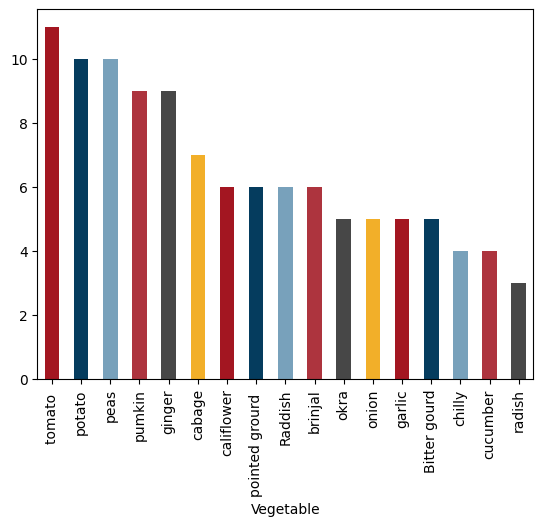

*************************************************************************
Season
winter     55
summer     32
monsoon    20
autumn      2
spring      2
Name: count, dtype: int64
                               Season


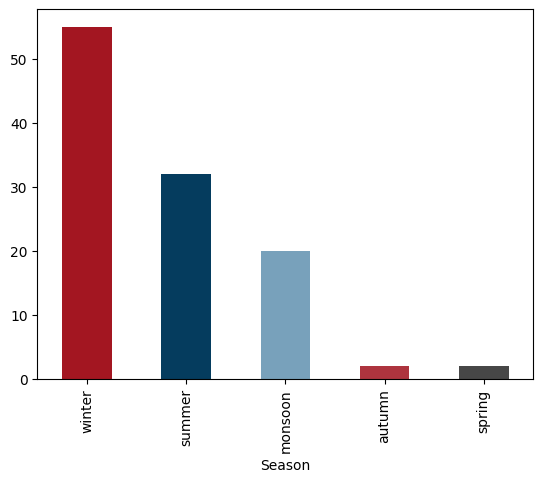

*************************************************************************
Month
jan      51
apr      19
july     10
may       8
dec       7
aug       7
          3
june      2
march     2
sept      1
oct       1
Name: count, dtype: int64
                               Month


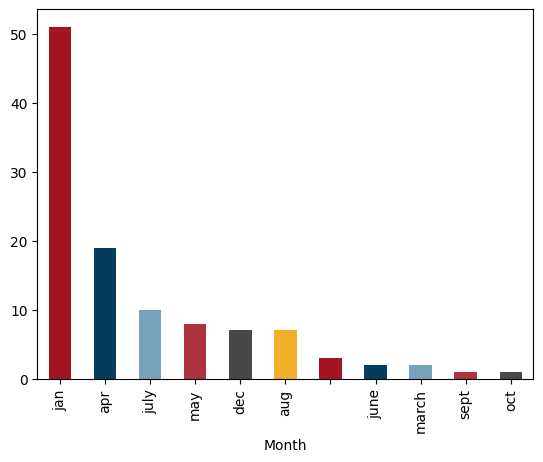

*************************************************************************
Deasaster Happen in last 3month
no     80
yes    31
Name: count, dtype: int64
                               Deasaster Happen in last 3month


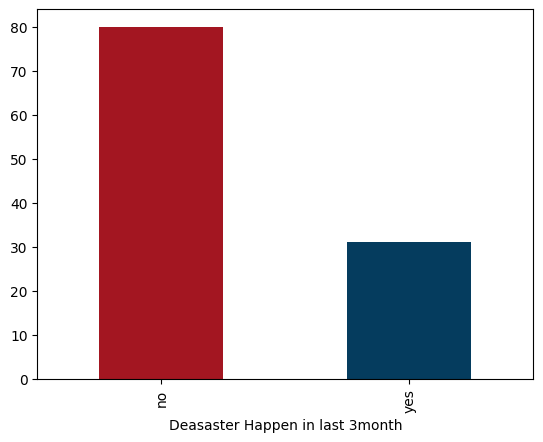

*************************************************************************
Vegetable condition
fresh      76
avarage    19
scrap      10
scarp       6
Name: count, dtype: int64
                               Vegetable condition


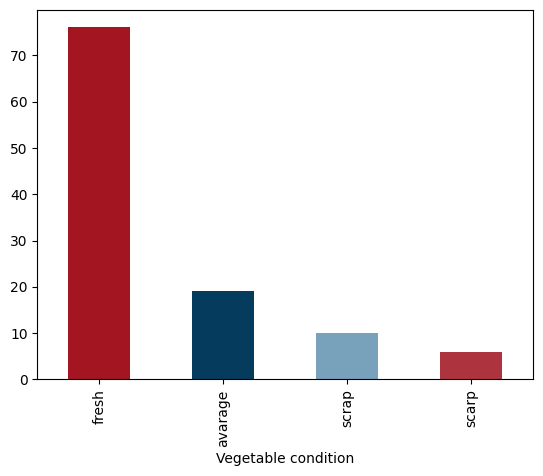

*************************************************************************


In [59]:
for i in df.columns:
    if i != "Price per kg" and i != "Temp":
        print(df[i].value_counts())
        print("                               "+i)
        df[i].value_counts().plot(kind="bar",color=['#a31621','#053c5e','#78a1bb','#ad343e' , '#474747' , '#f2af29'])
        plt.show()
        print("*************************************************************************")

### Displaying Unique Vegetable Types and Their Count

In [60]:
v_count=df["Vegetable"].nunique()
print(f"There Is A {v_count} Kind Of Vegetables")
print("*********************************************************")
df["Vegetable"].unique()

There Is A 17 Kind Of Vegetables
*********************************************************


array(['potato', 'tomato ', 'peas', 'pumkin', 'cucumber',
       'pointed grourd ', 'Raddish', 'Bitter gourd', 'onion', 'garlic',
       'cabage', 'califlower', 'chilly', 'okra', 'brinjal', 'ginger',
       'radish'], dtype=object)

### Counting Vegetables by Season Using Grouped Data

In [61]:
df.groupby("Season")["Vegetable"].value_counts()

Season   Vegetable      
autumn   Bitter gourd       1
         garlic             1
monsoon  okra               4
         cucumber           3
         peas               3
         potato             3
         pumkin             3
         pointed grourd     2
         cabage             1
         tomato             1
spring   califlower         2
summer   cabage             5
         peas               3
         pointed grourd     3
         potato             3
         radish             3
         tomato             3
         Raddish            2
         brinjal            2
         califlower         2
         ginger             2
         pumkin             2
         chilly             1
         onion              1
winter   ginger             7
         tomato             7
         Bitter gourd       4
         Raddish            4
         brinjal            4
         garlic             4
         onion              4
         peas               4
         potato

### Displaying Unique Months in the Dataset

In [62]:
df["Month"].unique()

array(['jan', 'apr', 'july', 'sept', 'oct', 'dec', 'may', 'aug', 'june',
       ' ', 'march'], dtype=object)

### Counting Month Occurrences by Season

In [63]:
df.groupby("Season")["Month"].value_counts()

Season   Month
autumn   oct       1
         sept      1
monsoon  july     10
         aug       7
                   3
spring   march     2
summer   apr      19
         may       8
         jan       3
         june      2
winter   jan      48
         dec       7
Name: count, dtype: int64

### Filtering Rows with Empty 'Month' Values

In [64]:
df[df["Month"]==" "]

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
43,pumkin,monsoon,,27,no,scrap,15
75,pumkin,monsoon,,27,no,scrap,20
103,pumkin,monsoon,,27,no,scrap,23


### Counting Vegetables by Month Using Grouped Data

In [65]:
df.groupby("Month")["Vegetable"].value_counts()

Month  Vegetable      
       pumkin             3
apr    peas               3
       potato             3
       radish             3
       tomato             3
       Raddish            2
       cabage             2
       califlower         2
       onion              1
aug    okra               4
       potato             3
dec    Bitter gourd       3
       potato             3
       califlower         1
jan    ginger             7
       tomato             7
       Raddish            4
       brinjal            4
       cabage             4
       garlic             4
       onion              4
       peas               4
       pumkin             4
       chilly             3
       Bitter gourd       1
       califlower         1
       cucumber           1
       okra               1
       pointed grourd     1
       potato             1
july   cucumber           3
       peas               3
       pointed grourd     2
       cabage             1
       tomato            

### Displaying Unique Vegetable Conditions and Their Count

In [66]:
vc_count=df["Vegetable condition"].nunique()
print(f"There Is A {vc_count} Vegetable condition")
print("**************************************************************")
print(df["Vegetable condition"].unique())

There Is A 4 Vegetable condition
**************************************************************
['fresh' 'scrap' 'avarage' 'scarp']


### Counting Vegetable Conditions by Season

In [67]:
df.groupby("Season")["Vegetable condition"].value_counts()

Season   Vegetable condition
autumn   fresh                   2
monsoon  fresh                  13
         scrap                   4
         avarage                 3
spring   fresh                   2
summer   fresh                  19
         avarage                11
         scrap                   2
winter   fresh                  40
         scarp                   6
         avarage                 5
         scrap                   4
Name: count, dtype: int64

### Cross-Tabulation of Vegetable Condition by Season

In [68]:
pd.crosstab(df["Vegetable condition"],df["Season"])

Season,autumn,monsoon,spring,summer,winter
Vegetable condition,,,,,
avarage,0,3,0,11,5
fresh,2,13,2,19,40
scarp,0,0,0,0,6
scrap,0,4,0,2,4


### Bar Plot of Vegetable Condition Distribution Across Seasons

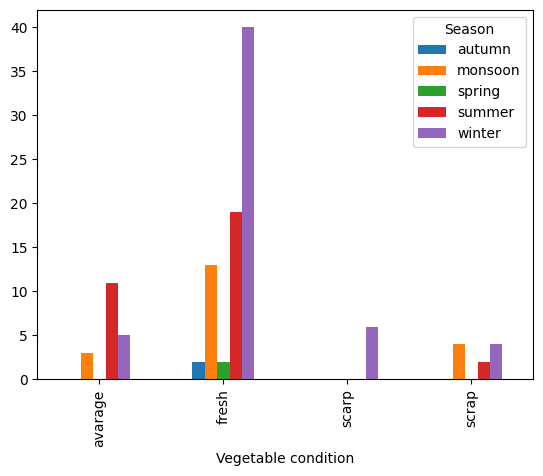

In [69]:
pd.crosstab(df["Vegetable condition"],df["Season"]).plot(kind="bar")
plt.show()

### Cross-Tabulation of Vegetable Condition by Month

In [71]:
pd.crosstab(df["Vegetable condition"],df["Month"])

Month,,apr,aug,dec,jan,july,june,march,may,oct,sept
Vegetable condition,,,,,,,,,,,
avarage,0,5,0,0,8,3,0,0,3,0,0
fresh,0,14,7,1,39,6,0,2,5,1,1
scarp,0,0,0,3,3,0,0,0,0,0,0
scrap,3,0,0,3,1,1,2,0,0,0,0


### Bar Plot of Vegetable Condition Distribution Across Months

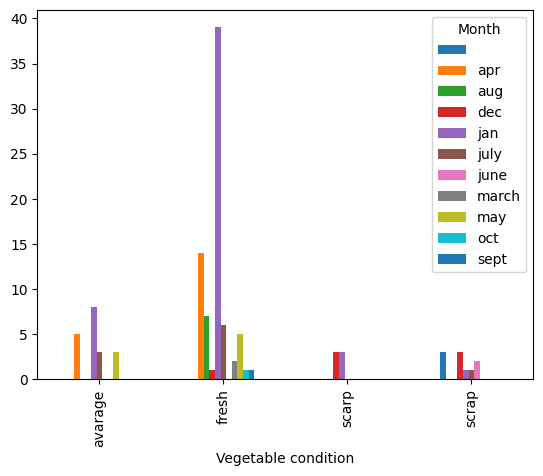

In [72]:
pd.crosstab(df["Vegetable condition"],df["Month"]).plot(kind="bar")
plt.show()

### Count of Vegetable Conditions Grouped by Season and Vegetable Type

In [73]:
df.groupby(["Season","Vegetable"])["Vegetable condition"].value_counts()

Season   Vegetable        Vegetable condition
autumn   Bitter gourd     fresh                  1
         garlic           fresh                  1
monsoon  cabage           scrap                  1
         cucumber         avarage                3
         okra             fresh                  4
         peas             fresh                  3
         pointed grourd   fresh                  2
         potato           fresh                  3
         pumkin           scrap                  3
         tomato           fresh                  1
spring   califlower       fresh                  2
summer   Raddish          avarage                2
         brinjal          fresh                  2
         cabage           avarage                3
                          fresh                  2
         califlower       fresh                  2
         chilly           fresh                  1
         ginger           scrap                  2
         onion            fresh     

### Average Price per kg of Vegetables by Season

In [74]:
df.groupby("Season").agg({"Price per kg": "mean"}).sort_values(by="Price per kg", ascending=False)


,Price per kg
Season,
autumn,120.000000
summer,62.656250
monsoon,60.550000
winter,50.163636
spring,19.500000


### Price Distribution by Season

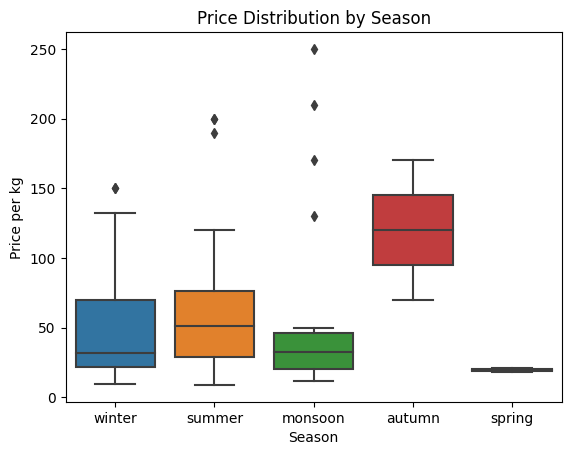

In [75]:
sns.boxplot(data=df, x='Season', y='Price per kg')
plt.title('Price Distribution by Season')
plt.show()

### Average Price per kg of Vegetables

In [24]:
df.groupby("Vegetable").agg({"Price per kg":"mean"}).sort_values(by="Price per kg", ascending=False)


,Price per kg
Vegetable,
garlic,139.000000
ginger,114.222222
chilly,111.250000
peas,98.500000
tomato,58.818182
pointed grourd,57.166667
cabage,51.142857
brinjal,48.333333
Bitter gourd,38.200000


### "Box Plot of Price Distribution by Vegetable"
### "Price per kg Distribution Across Different Vegetables"

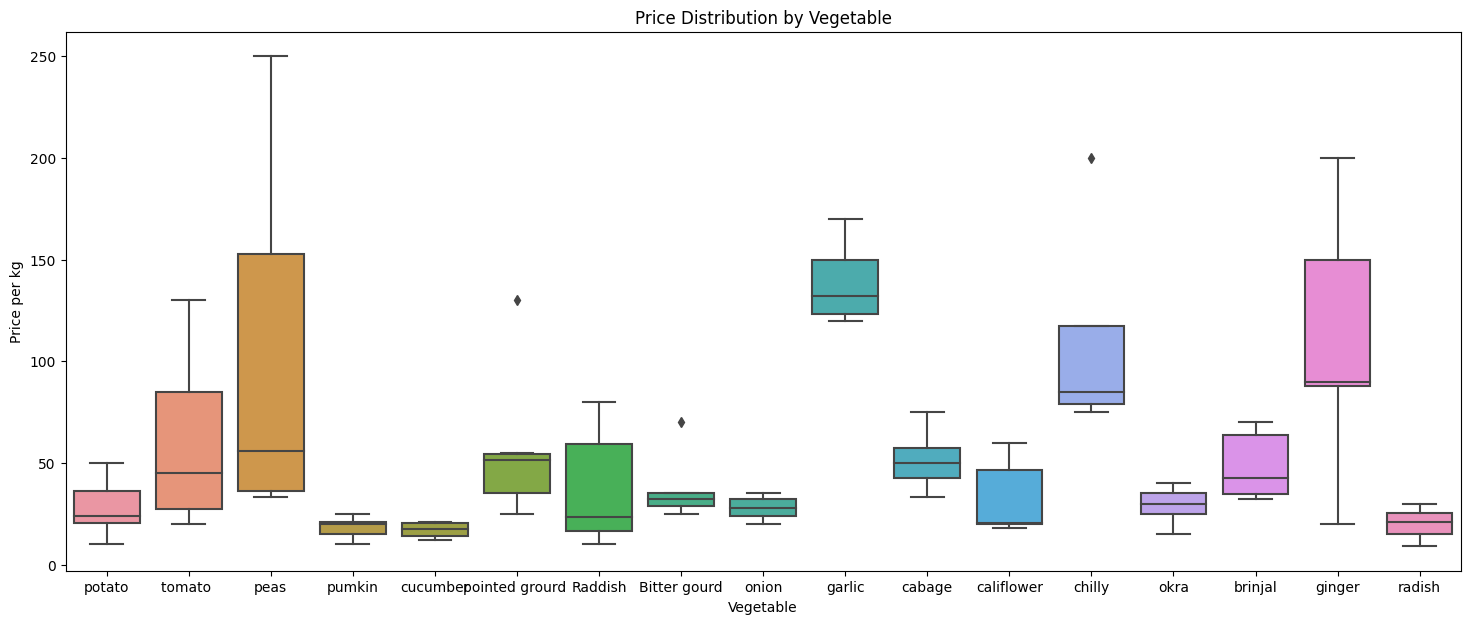

In [89]:
plt.figure(figsize=(18,7))
sns.boxplot(data=df, x='Vegetable', y='Price per kg')

plt.title('Price Distribution by Vegetable')
plt.show()

### Average Price per kg by Vegetable Condition

In [86]:
df.groupby("Vegetable condition").agg({"Price per kg": "mean"}).sort_values(by="Price per kg", ascending=False)


,Price per kg
Vegetable condition,
fresh,59.315789
scrap,56.800000
avarage,51.315789
scarp,33.833333


### Box Plot of Price Distribution by Vegetable Condition
### Price per kg Distribution Across Vegetable Conditions

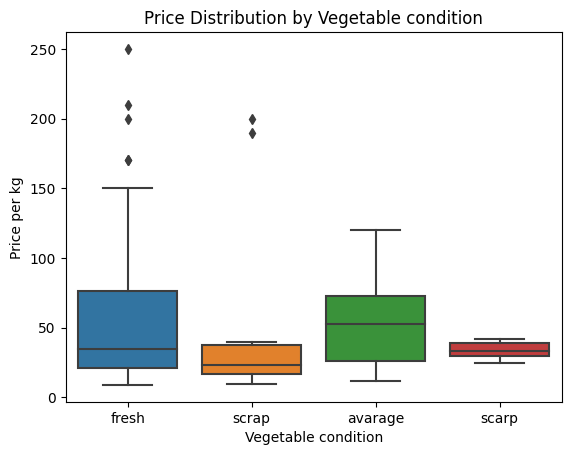

In [88]:
sns.boxplot(data=df, x='Vegetable condition', y='Price per kg')
plt.title('Price Distribution by Vegetable condition')
plt.show()

### Unique Months in the Dataset

In [25]:
df["Month"].unique()

array(['jan', 'apr', 'july', 'sept', 'oct', 'dec', 'may', 'aug', 'june',
       ' ', 'march'], dtype=object)

### Temperature Distribution

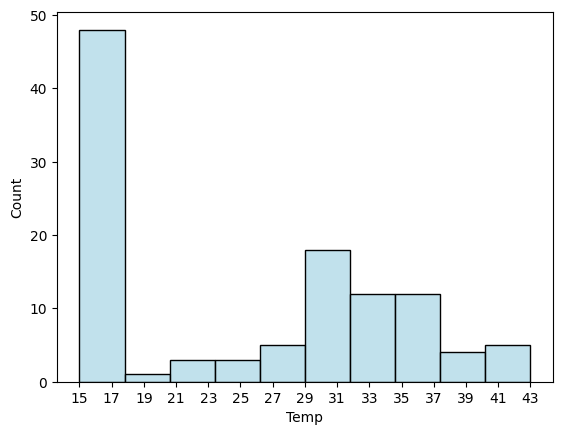

In [26]:
sns.histplot(data=df , x="Temp" , color="lightblue",bins=10)
plt.xticks(ticks=np.arange(df["Temp"].min() , df["Temp"].max()+2 ,step=2) )
plt.show()

### Stacked Histogram of Temperature by Vegetable Condition

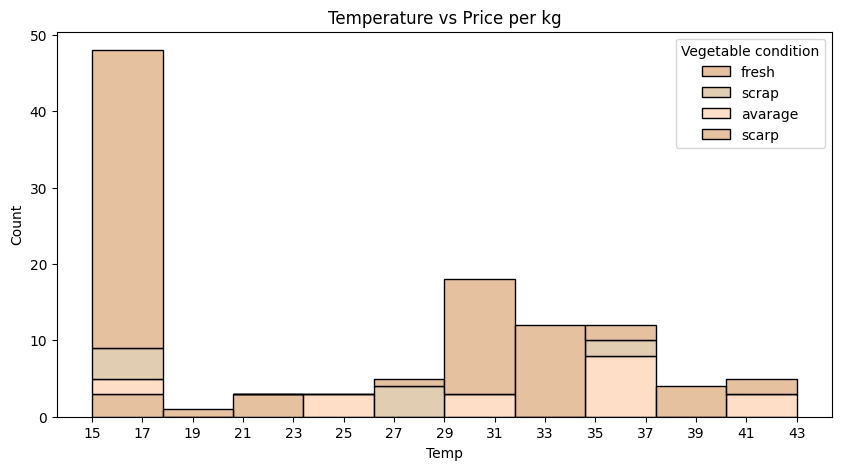

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Temp', hue='Vegetable condition',palette=["#DEAC80","#D6BD98", "#FFD3B6"],multiple="stack",bins=10)
plt.xticks(ticks=np.arange(df["Temp"].min() , df["Temp"].max()+2 ,step=2) )

plt.title('Temperature vs Price per kg')
plt.show()

### Stacked Histogram of Temperature by Season

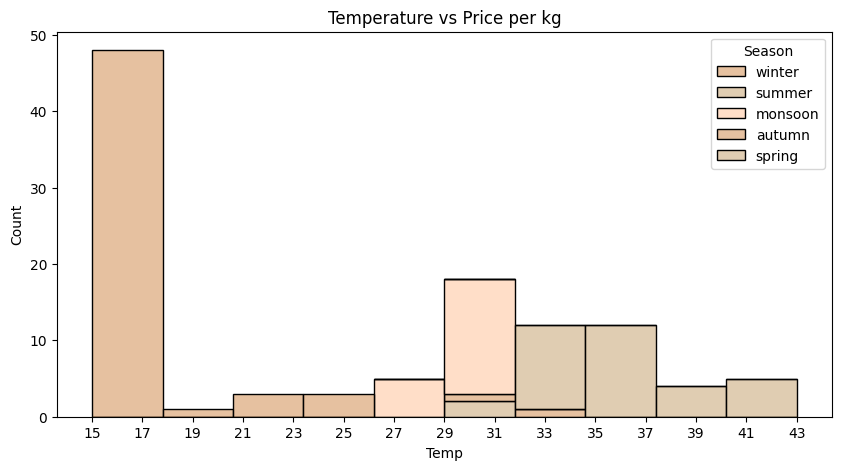

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Temp', hue='Season',palette=["#DEAC80","#D6BD98", "#FFD3B6"],multiple="stack",bins=10)
plt.xticks(ticks=np.arange(df["Temp"].min() , df["Temp"].max()+2 ,step=2) )

plt.title('Temperature vs Price per kg')
plt.show()

### Stacked Histogram of Temperature by Month

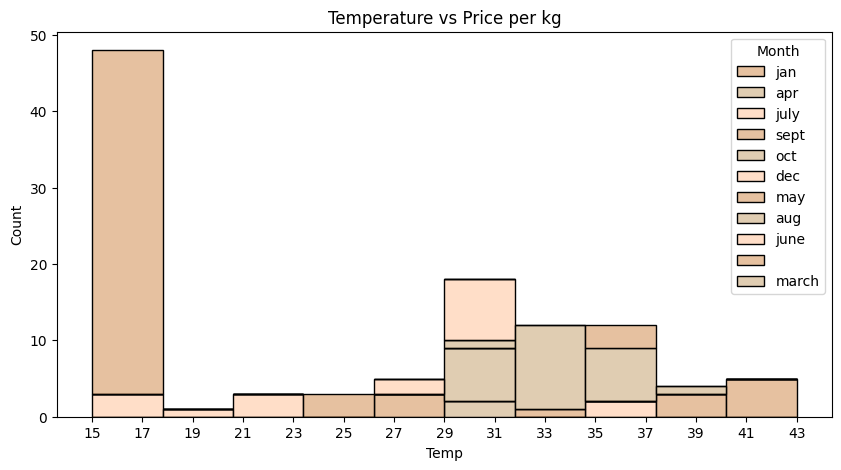

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Temp', hue='Month',palette=["#DEAC80","#D6BD98", "#FFD3B6"],multiple="stack",bins=10)
plt.xticks(ticks=np.arange(df["Temp"].min() , df["Temp"].max()+2 ,step=2) )

plt.title('Temperature vs Price per kg')
plt.show()


### Mapping Month Abbreviations to Integers in a DataFrame

In [96]:
# Mapping dictionary for month abbreviations to integers
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Convert the "Month" column using the mapping
df["Month"] = df["Month"].str.strip().str.lower().map(month_mapping)

# Display the updated DataFrame
df.head()


,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
0,potato,winter,1.0,15,no,fresh,20
1,tomato,winter,1.0,15,no,fresh,50
2,peas,winter,1.0,15,no,fresh,70
3,pumkin,winter,1.0,15,no,fresh,25
4,cucumber,winter,1.0,15,no,fresh,20


### Encoding Categorical Variables in a DataFrame

In [99]:
df["Season"].replace({"winter":0,"summer":1,"monsoon":2,"autumn":3,"spring":4},inplace=True)
df["Deasaster Happen in last 3month"].replace({"no":0,"yes":1},inplace=True)
df["Vegetable condition"].replace({"avarage":0,"fresh":1,"scarp":2,"scrap":3},inplace=True)
df.head()

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
0,potato,0,1.0,15,0,1,20
1,tomato,0,1.0,15,0,1,50
2,peas,0,1.0,15,0,1,70
3,pumkin,0,1.0,15,0,1,25
4,cucumber,0,1.0,15,0,1,20


### Transforming Categorical Data to Numeric with Label Encoding

In [101]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Vegetable']=le.fit_transform(df['Vegetable'])

### Displaying the Updated DataFrame After Label Encoding

In [121]:
df.head()

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
0,13,0,1.0,15,0,1,20
1,16,0,1.0,15,0,1,50
2,11,0,1.0,15,0,1,70
3,14,0,1.0,15,0,1,25
4,6,0,1.0,15,0,1,20


### DataFrame Summary: Structure and Data Types

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Vegetable                        121 non-null    int64  
 1   Season                           121 non-null    int64  
 2   Month                            101 non-null    float64
 3   Temp                             121 non-null    int64  
 4   Deasaster Happen in last 3month  121 non-null    int64  
 5   Vegetable condition              121 non-null    int64  
 6   Price per kg                     121 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 6.7 KB


### Correlation Matrix: Analyzing Feature Relationships

In [103]:
cor=df.corr()
cor

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
Vegetable,1.000000,-0.006589,-0.024027,0.021963,-0.161017,0.016246,-0.065343
Season,-0.006589,1.000000,0.486318,0.642392,0.361826,-0.021364,0.059983
Month,-0.024027,0.486318,1.000000,0.367928,0.044206,0.391431,-0.139566
Temp,0.021963,0.642392,0.367928,1.000000,0.204812,-0.225208,0.110549
Deasaster Happen in last 3month,-0.161017,0.361826,0.044206,0.204812,1.000000,-0.065780,0.441536
Vegetable condition,0.016246,-0.021364,0.391431,-0.225208,-0.065780,1.000000,0.000466
Price per kg,-0.065343,0.059983,-0.139566,0.110549,0.441536,0.000466,1.000000


#### Heatmap of Feature Correlations

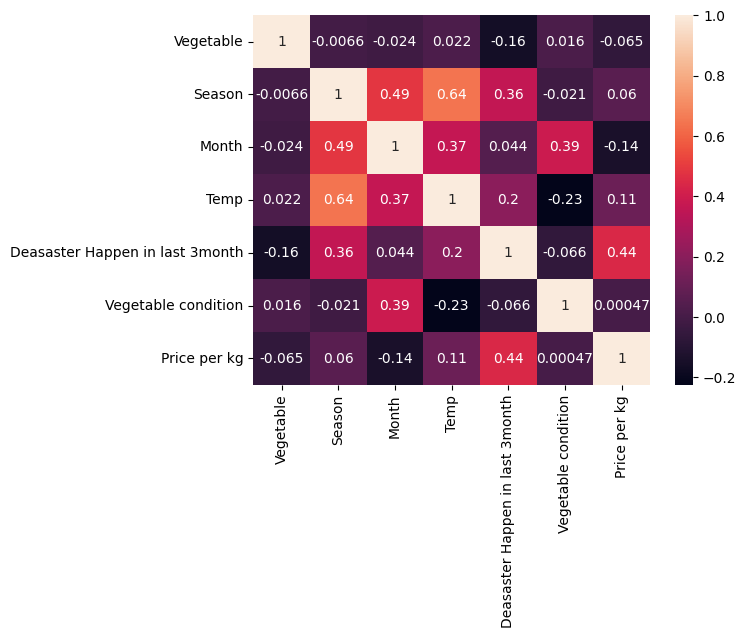

In [105]:
sns.heatmap(cor,annot=True)
plt.show()

### Pairplot: Visualizing Relationships Between Features

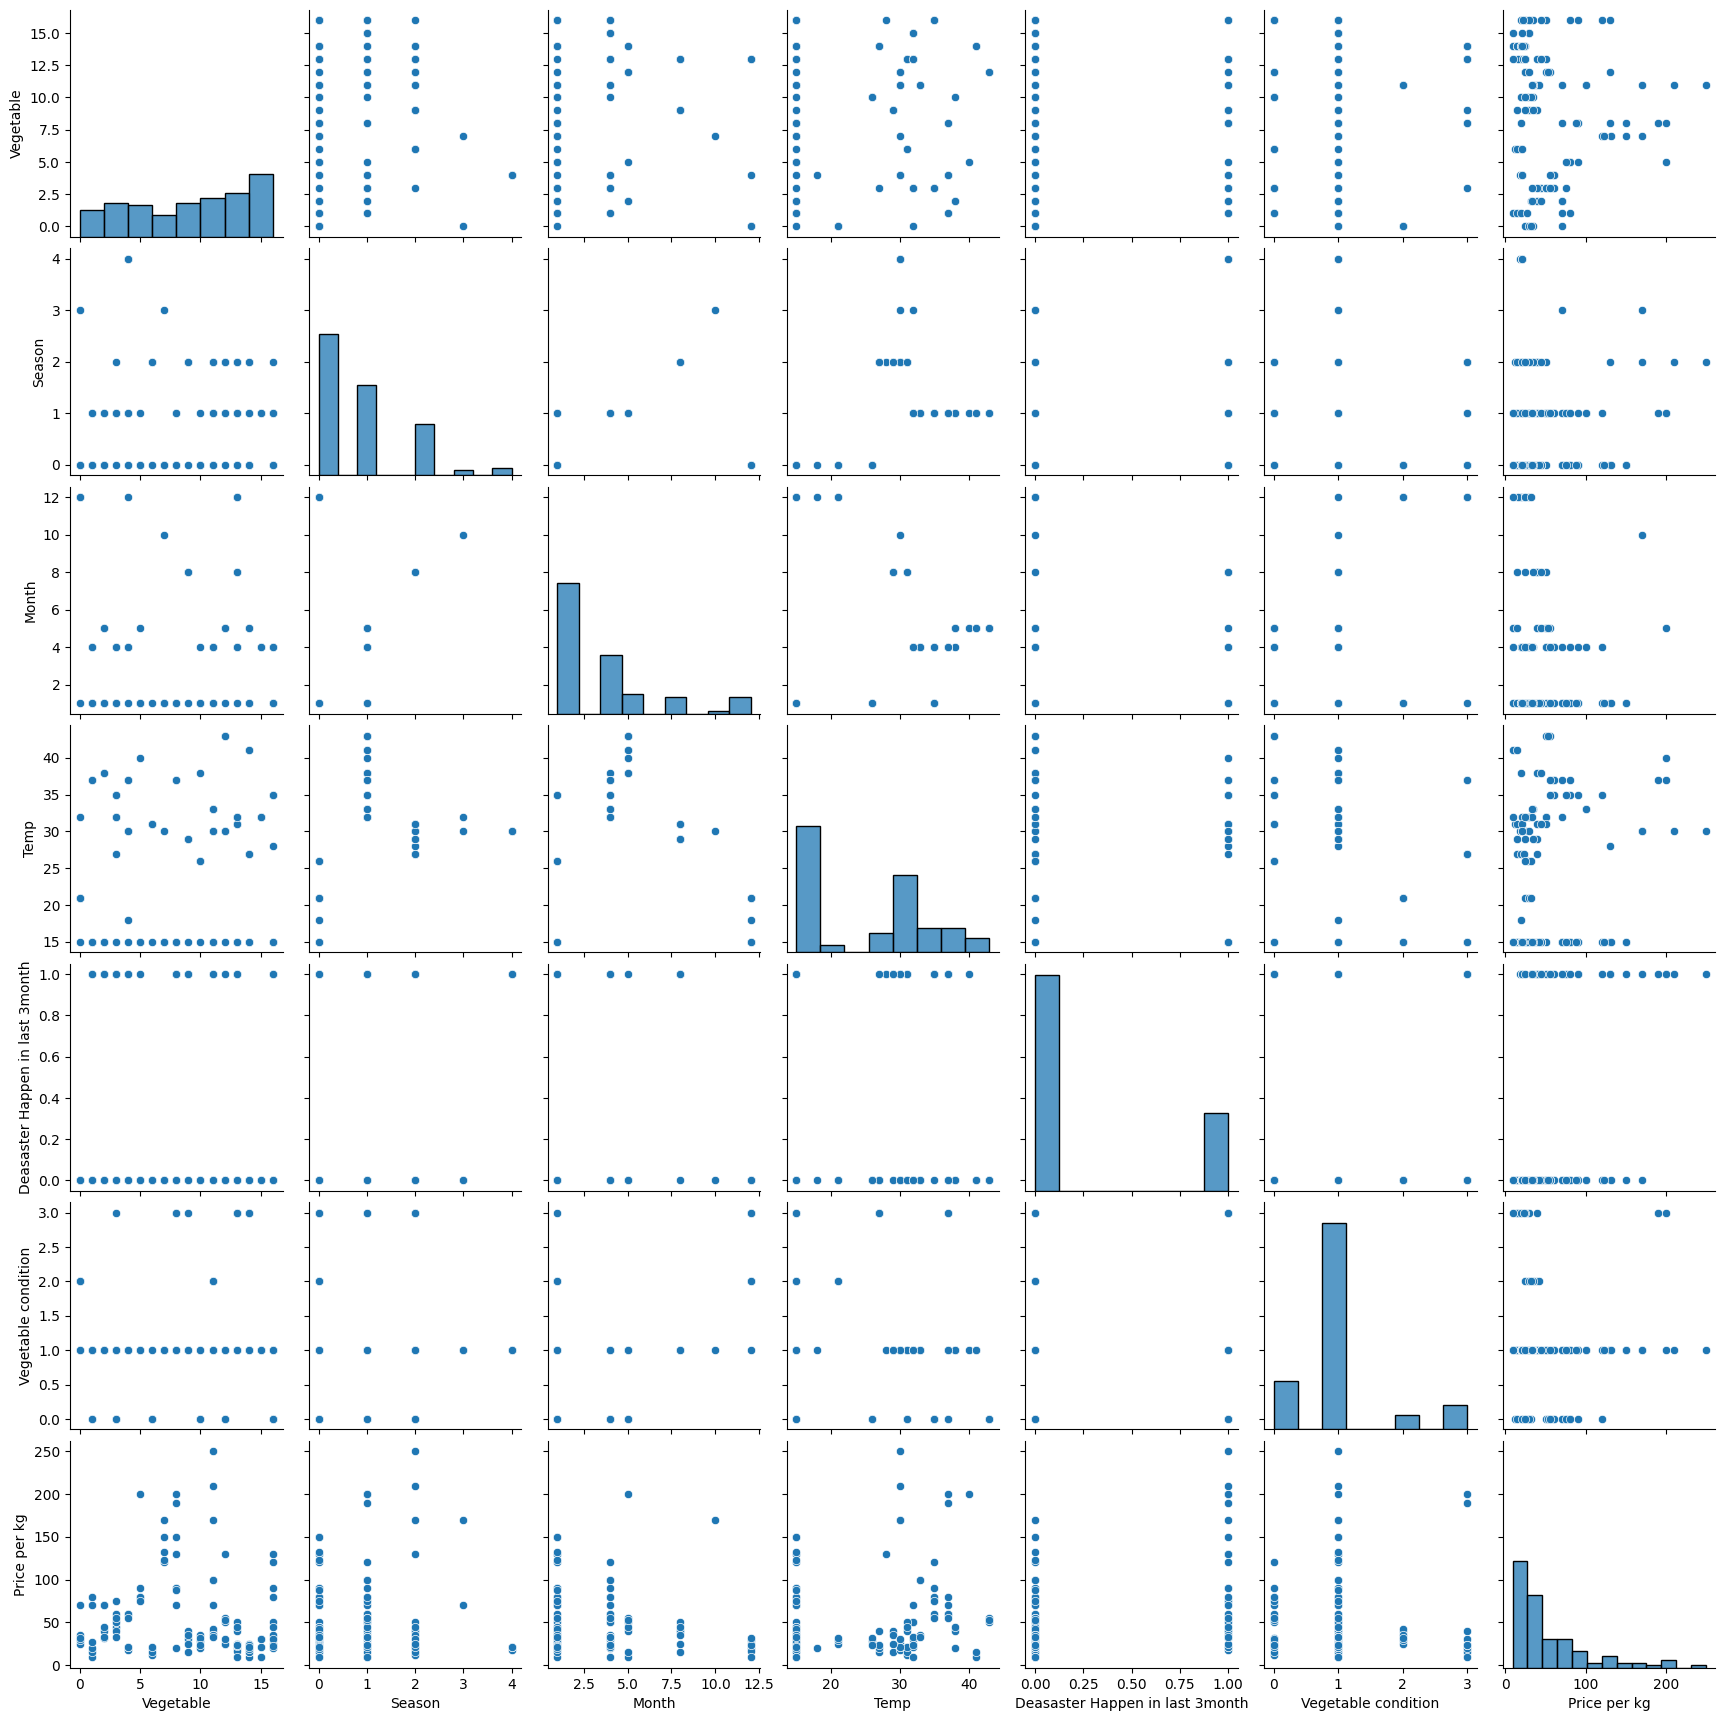

In [107]:
sns.pairplot(df)
plt.show()

### Histogram: Distribution of Features in the Dataset

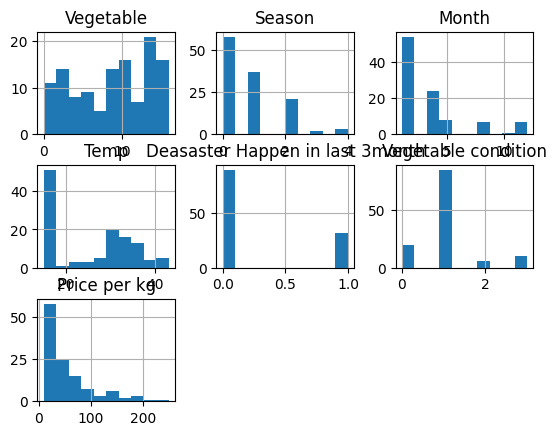

In [120]:
df.hist()

plt.show()

### Defining Features and Target Variable for Model Training

In [127]:
x=df.drop("Price per kg",axis=1)
y=df["Price per kg"]

### Splitting Data into Training and Testing Sets

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(f"Shape of x_train : {x_train.shape}")
print(f"Shape of x_test : {x_test.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of y_test : {y_test.shape}")

Shape of x_train : (96, 6)
Shape of x_test : (25, 6)
Shape of y_train : (96,)
Shape of y_test : (25,)


# Building Model

### Initializing the XGBoost Regressor Model

In [130]:
from xgboost import XGBRegressor
model=XGBRegressor()

### Training the XGBoost Regressor Model

In [143]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Making Predictions with the Trained XGBoost Model

In [144]:
y_pred=model.predict(x_test)

### Evaluating Model Performance on Training Data

In [149]:
model.score(x_train,y_train)

0.9470297641438858

### Generating and Visualizing the Confusion Matrix

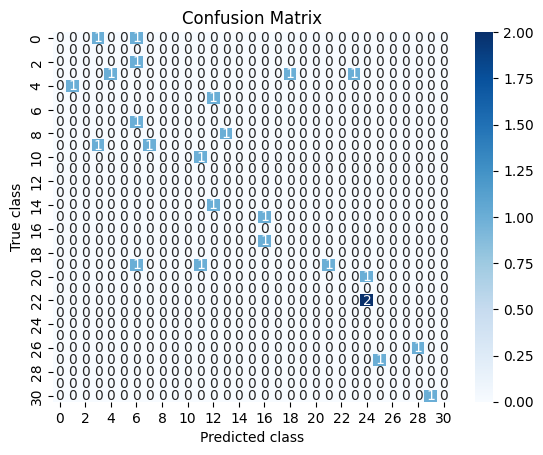

In [147]:
if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred = y_pred.argmax(axis=1)  # Convert probabilities to class labels
    
    # Check if y_test is also a 1D array
if y_test.ndim > 1:
        y_test = y_test.flatten()

    # Ensure both y_test and y_pred are integers for classification metrics
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)
    
conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix')
plt.show()
